In [4]:
import pandas as pd

# The file is a CSV, not an Excel file, so we use pd.read_csv()
# We also specify index_col=0 to use the first column as the DataFrame index.
df = pd.read_csv("College_Data.xls", index_col=0)

# Display the DataFrame
#print(df)

# Inspect the data
print(df.shape)        # rows, columns
print(df.head())       # first few rows
print(df.info())       # column types
df.describe(include='all').T   # nice quick stats, includes non-numeric
df.isnull().sum().sort_values(ascending=False)
df['Private'].value_counts()   # check class balance for Private




(777, 18)
                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \


Private
Yes    565
No     212
Name: count, dtype: int64

In [5]:
# 2.1 Standardize column names (optional)
df.columns = [c.strip() for c in df.columns]

# 2.2 Strip strings & unify Private
df['Private'] = df['Private'].str.strip()

# map Private to binary
df['Private_bin'] = df['Private'].map({'Yes': 1, 'No': 0})

# 2.3 Convert numeric columns that may be strings (example)
df['S.F.Ratio'] = pd.to_numeric(df['S.F.Ratio'], errors='coerce')  # coerce bad -> NaN

# 2.4 Check duplicates
df = df[~df.index.duplicated()]

# 2.5 Handle missing values (simple approaches)
df.isnull().sum()
# Example strategies:
# - If only a few nulls: df.dropna(subset=['col1','col2'])
# - If numeric: fill with median:
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [6]:
# Avoid divide-by-zero; use .where or replace zeros
df['Apps'] = df['Apps'].replace(0, pd.NA)

# 3.1 Acceptance rate
df['accept_rate'] = df['Accept'] / df['Apps']

# 3.2 Yield (enrolled among accepted)
df['yield_rate'] = df['Enroll'] / df['Accept']

# 3.3 Total undergraduates and percentage of each
df['total_undergrad'] = df['F.Undergrad'] + df['P.Undergrad']
df['pct_female_undergrad'] = df['F.Undergrad'] / df['total_undergrad']

# 3.4 Total annual student cost (approx)
df['total_cost'] = df['Outstate'] + df['Room.Board'] + df['Books'] + df['Personal']

# 3.5 Student-to-faculty ratio numeric fix (if it is string like "18.1")
df['S.F.Ratio'] = pd.to_numeric(df['S.F.Ratio'], errors='coerce')


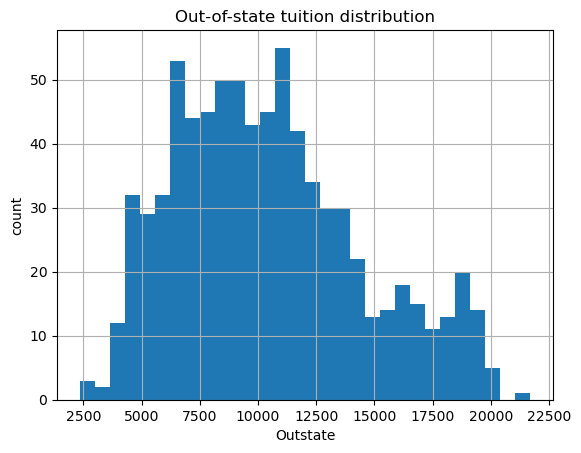

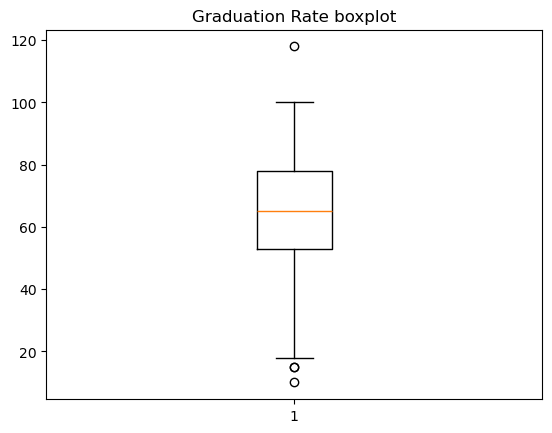

In [7]:
import matplotlib.pyplot as plt

# histogram example
df['Outstate'].hist(bins=30)
plt.title("Out-of-state tuition distribution")
plt.xlabel("Outstate"); plt.ylabel("count")
plt.show()

# boxplot to spot outliers
plt.boxplot(df['Grad.Rate'].dropna())
plt.title("Graduation Rate boxplot")
plt.show()


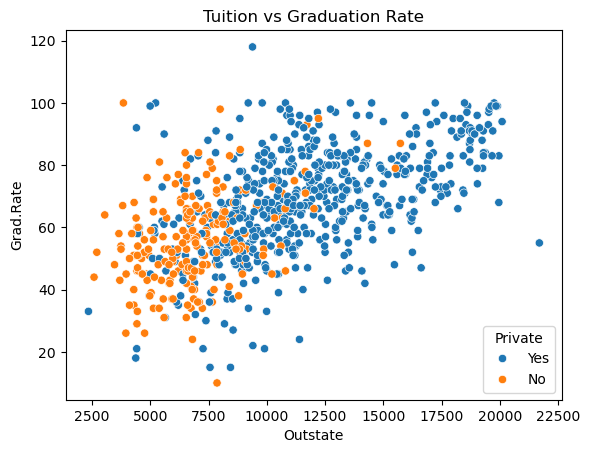

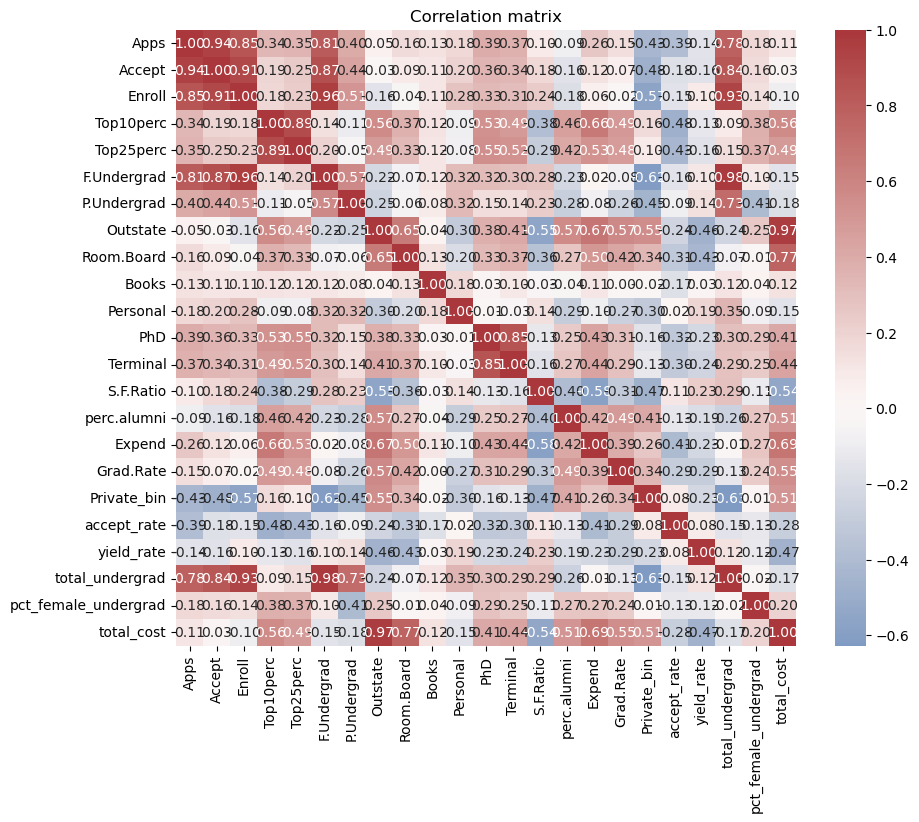

In [8]:
import seaborn as sns

# scatter: tuition vs grad rate
sns.scatterplot(data=df, x='Outstate', y='Grad.Rate', hue='Private')
plt.title("Tuition vs Graduation Rate"); plt.show()

# correlation matrix heatmap (use only numeric cols)
num = df.select_dtypes(include=['number'])
corr = num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation matrix"); plt.show()


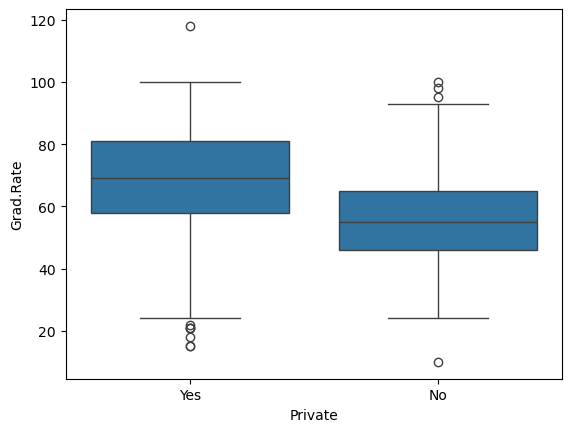

In [10]:
df.groupby('Private')[['Grad.Rate', 'Outstate', 'total_cost']].median().T

sns.boxplot(data=df, x='Private', y='Grad.Rate'); plt.show()
